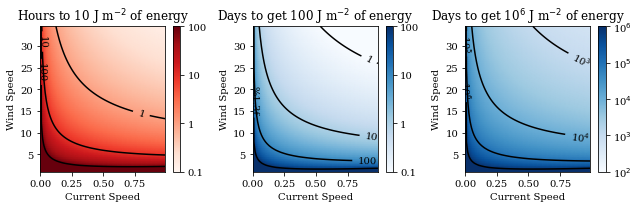

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Paths import Figure_Save_Path

plt.rcParams["font.family"] = "Serif"
%matplotlib inline

Wind = np.arange(1.,35.,.5)
Current = np.arange(0.,1.,0.01)
Tau = np.zeros([len(Wind),len(Current)])
EFlux_W2C = np.zeros([len(Wind),len(Current)])
EFlux_C2TKE = np.zeros([len(Wind),len(Current)])
for wi,W in enumerate(Wind):
    for ci,C in enumerate(Current):
        Tau[wi,ci] = (W-C)**2*0.0015*1.25 #(kg/m.s2)
        EFlux_W2C[wi,ci] = Tau[wi,ci]*C #(kg/s3) -> J/m2/s
        EFlux_C2TKE[wi,ci] = EFlux_W2C[wi,ci]*0.01+1.e-10

# plt.figure()
# plt.pcolormesh(Current,Wind,EFlux_C2TKE,cmap='RdYlBu_r',vmin=0,vmax=0.05)
# plt.ylabel('Wind Speed')
# plt.xlabel('Current Speed')
# plt.title('Energy into TKE (W/m2)')
# plt.colorbar()

f,a=plt.subplots(1,3,figsize=(9.,3.))

ax=a.ravel()[0]
CB=ax.pcolormesh(Current,Wind,np.log10(10/EFlux_C2TKE/3600),cmap='Reds',vmin=-1,vmax=2,shading='gouraud')
cb=plt.colorbar(CB,ax=ax)
cb.set_ticks([-1,0,1,2])
strs = ['0.1','1','10','100']
cb.ax.set_yticklabels(strs)
CS=ax.contour(Current,Wind,np.log10(10/EFlux_C2TKE/3600),'-',levels=[-1,0,1,2],colors=['k'])
fmt = {}
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Current Speed')
ax.set_title('Hours to 10 J m$^{-2}$ of energy')

ax=a.ravel()[1]
CB=ax.pcolormesh(Current,Wind,np.log10(100/EFlux_C2TKE/3600/24),cmap='Blues',vmin=-1,vmax=2,shading='gouraud')
cb=plt.colorbar(CB,ax=ax)
cb.set_ticks([-1,0,1,2])
strs = ['0.1','1','10','100']
cb.ax.set_yticklabels(strs)
CS=ax.contour(Current,Wind,np.log10(10**6/EFlux_C2TKE/3600/24),'-',levels=[2,3,4,5,6],colors=['k'])
fmt = {}
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Current Speed')
ax.set_title('Days to get 100 J m$^{-2}$ of energy')


ax=a.ravel()[2]
CB=ax.pcolormesh(Current,Wind,np.log10(10**6/EFlux_C2TKE/3600/24),cmap='Blues',vmin=2,vmax=6,shading='gouraud')
cb=plt.colorbar(CB,ax=ax)
cb.set_ticks([2,3,4,5,6])
strs = ['10$^2$','10$^3$','10$^4$','10$^5$','10$^6$']
cb.ax.set_yticklabels(strs)
CS=ax.contour(Current,Wind,np.log10(10**6/EFlux_C2TKE/3600/24),'-',levels=[2,3,4,5,6],colors=['k'])
fmt = {}
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Current Speed')
ax.set_title('Days to get 10$^6$ J m$^{-2}$ of energy')


f.tight_layout()

f.savefig(Figure_Save_Path+'/FigureApp2.png')